In [16]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csvpath = os.path.join("../project_1/California_Fire_Incidents.csv")
cal_fires_df = pd.read_csv(csvpath)

# Set display options to show all columns

pd.set_option('display.max_columns',None)


cal_fires_df


,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Fatalities,Featured,Final,FuelType,Helicopters,Injuries,Latitude,Location,Longitude,MajorIncident,Name,PercentContained,PersonnelInvolved,Public,SearchDescription,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,55,NaN,NaN,NaN,2013-09-06T18:30:00Z,NaN,False,True,NaN,NaN,NaN,37.857000,3 miles east of Groveland along Hwy 120,-120.086000,False,Rim Fire,100.0,NaN,True,The Rim Fire was east of Groveland along Highw...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,19,NaN,NaN,NaN,2013-06-08T18:30:00Z,NaN,False,True,NaN,NaN,NaN,34.585595,Angeles National Forest,-118.423176,False,Powerhouse Fire,100.0,NaN,True,The Powerhouse Fire burned in May and June 201...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,33,NaN,NaN,NaN,2013-07-30T18:00:00Z,NaN,False,True,NaN,NaN,NaN,33.709500,Hwy 243 & Hwy 74 near Mountain Center,-116.728850,False,Mountain Fire,100.0,NaN,True,The Mountain Fire burned in July 2013 off High...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,31,NaN,NaN,NaN,2013-08-30T08:00:00Z,NaN,False,True,NaN,NaN,NaN,39.120000,"Deadwood Ridge, northeast of Foresthill",-120.650000,False,American Fire,100.0,NaN,True,The American Fire burned in August 2013 off De...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,56,47.0,8.0,117.0,2013-05-11T06:30:00Z,NaN,False,True,NaN,11.0,10.0,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,0.000000,True,Springs Fire,100.0,2167.0,True,"The Springs Fire burned in May 2013, Southboun...","Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,9.0,False,CAL FIRE / Riverside County Fire,NaN,2019,True,/incidents/2019/10/10/eagle-fire/,NaN,NaN,Riverside,33,NaN,NaN,NaN,2019-10-10T18:11:00Z,NaN,False,True,NaN,NaN,NaN,33.827979,"Eagle Canyon Rd. and Cajalco Rd., southwest of...",-117.499619,False,Eagle Fire,100.0,NaN,True,"The Eagle Fire started on October 10, 2019 nea...",NaN,2019-10-10T12:08:00Z,Finalized,NaN,NaN,NaN,NaN,6e93b252-99a3-4214-9921-238373b17535,2019-10-10T18:11:59.733Z,NaN
1632,2.0,False,CAL FIRE Nevada-Yuba-Placer Unit,NaN,2019,True,/incidents/2019/6/28/long-fire/,NaN,NaN,Nevada,29,NaN,NaN,NaN,2019-06-28T17:33:00Z,NaN,False,True,NaN,NaN,NaN,39.409722,"Off of Long Point Road and Old Mill Road, Sou...",-121.000556,False,Long Fire,100.0,NaN,True,"Long Fire started on June 28, 2019 off of Long...",NaN,2019-06-28T15:03:04Z,Finalized,NaN,NaN,NaN,NaN,b38c0563-b32

In [17]:
# Total number of wildfires
total_fires = len(cal_fires_df)
print(f"Total number of wildfires recorded: {total_fires}")

Total number of wildfires recorded: 1636


In [18]:
# Numeber of personnel, air tankers, and other firefighting resources used on average per wildfire.	

# Convert columns to numeric
resource_columns = ["PersonnelInvolved","CrewsInvolved", "AirTankers", "Engines", "Helicopters", "WaterTenders"]
cal_fires_df[resource_columns] = cal_fires_df[resource_columns].apply(pd.to_numeric, errors='coerce')

# Calculate the average number of resources used per wildfire
average_resources = cal_fires_df[resource_columns].mean()



In [30]:
# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Resource Type": average_resources.index,
    "Average Used per Fire": average_resources.values
})
# Display the DataFrame
print(summary_df)

       Resource Type  Average Used per Fire
0  PersonnelInvolved             328.553922
1      CrewsInvolved              11.561404
2         AirTankers               4.071429
3            Engines              23.565445
4        Helicopters               5.357143
5       WaterTenders               7.815068


/var/folders/69/w7_9wntx125gjmdpq68f_6j80000gn/T/ipykernel_51619/4259740543.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=summary_df["Resource Type"], x=summary_df["Average Used per Fire"], palette="magma")


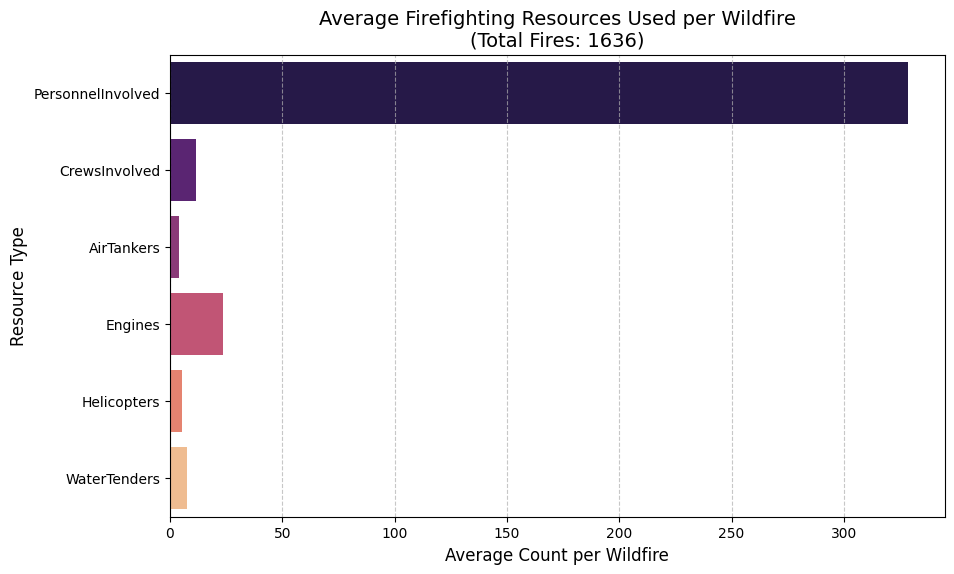

In [ ]:
# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(y=summary_df["Resource Type"], x=summary_df["Average Used per Fire"], palette="magma")

plt.title(f"Average Firefighting Resources Used per Wildfire\n(Total Fires: {total_fires})", fontsize=14)
plt.xlabel("Average Count per Wildfire", fontsize=12)_
plt.ylabel("Resource Type", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()